In [1]:
suppressMessages(suppressWarnings(source("/home/mount/project/config_sing.R")))
#suppressMessages(suppressWarnings(source("config_sing.R")))

In [2]:
dir(FD_RES)

[1] "annotation_fragment" "count_fragment"      "coverage"           
[4] "data"                "log"                 "model_linear"       
[7] "source"

In [3]:
fdiry = file.path(FD_RES, "model_linear")
for (fpath in dir(fdiry)){cat(fpath, "\n")}

fit_interactive_target_PER1.rds 
fit_marginal_target_PER1.rds 
res_interactive_chr17.rds 
res_interactive_chr17.tsv 
res_interactive_chr20.rds 
res_interactive_chr20.tsv 
res_interactive_chr21.rds 
res_interactive_chr21.tsv 
res_interactive_chr22.rds 
res_interactive_chrX.rds 
res_interactive_chrX.tsv 
res_interactive_chrY.rds 
res_interactive_target_PER1.rds 
res_marginal_chr13.rds 
res_marginal_chr14.rds 
res_marginal_chr15.rds 
res_marginal_chr17.rds 
res_marginal_chr18.rds 
res_marginal_chr20.rds 
res_marginal_chr21.rds 
res_marginal_chr4.rds 
res_marginal_chrX.rds 
res_marginal_chrY.rds 


* res_marginal_chr17.rds
* res_marginal_chr20.rds 
* res_marginal_chr21.rds
* res_marginal_chrY.rds 

## Import data

In [4]:
fdiry = file.path(FD_RES, "model_linear")
fname = "res_marginal_chr17.rds"
fpath = file.path(fdiry, fname)
lst_res_chr17 = readRDS(fpath)

In [5]:
fdiry = file.path(FD_RES, "model_linear")
fname = "res_marginal_chr20.rds"
fpath = file.path(fdiry, fname)
lst_res_chr20 = readRDS(fpath)

In [6]:
fdiry = file.path(FD_RES, "model_linear")
fname = "res_marginal_chr21.rds"
fpath = file.path(fdiry, fname)
lst_res_chr21 = readRDS(fpath)

In [7]:
fdiry = file.path(FD_RES, "model_linear")
fname = "res_marginal_chrX.rds"
fpath = file.path(fdiry, fname)
lst_res_chrX = readRDS(fpath)

In [8]:
fun = function(motifs){
    res = sapply(motifs, function(motif){
        if (motif == "NR/20"){ return("red") }
        if (motif == "AP1/1"){ return("blue") }
        return("grey50")
    })
    return(res)
}

In [9]:
lst_dat = list(lst_res_chr17, lst_res_chr20, lst_res_chr21, lst_res_chrX)
lst_dat = lapply(lst_dat, function(lst_res){
    ###
    lst = lapply(names(lst_res), function(mtf){
        res = lst_res[[mtf]]
        dat = as.data.frame(coef(res))
        dat = rownames_to_column(dat, var="X")
        dat$Motif = mtf
        return(dat)
    })
    
    ###
    dat = bind_rows(lst)
    dat = dat %>% dplyr::filter(str_detect(X, "Intercept", negate = TRUE))
    dat$Color = fun(dat$Motif)
    dat$X = factor(dat$X, levels=c("XXTFX_DMSO", "XXTFX_Dex"))
    return(dat)
})

In [10]:
lst_dat = lapply(lst_dat, function(dat){
    dat$adj_pval = p.adjust(dat$`Pr(>|t|)`, method = "BH")
    return(dat)
})

## Export

In [15]:
head(lst_dat[[1]])

,X,Estimate,Std. Error,t value,Pr(>|t|),Motif,Color,adj_pval
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
1,XXTFX_DMSO,-1.717128e-06,1.079250e-06,-1.5910388,1.426851e-01,AIRE,grey50,1.722184e-01
2,XXTFX_Dex,-1.028823e-06,1.137629e-06,-0.9043572,3.870743e-01,AIRE,grey50,4.346728e-01
3,XXTFX_DMSO,8.849993e-04,2.938058e-05,30.1219140,3.805882e-11,AP1/1,blue,3.475560e-10
4,XXTFX_Dex,1.976401e-04,3.096985e-05,6.3816948,8.018454e-05,AP1/1,blue,1.874846e-04
5,XXTFX_DMSO,8.015783e-04,3.187136e-05,25.1504233,2.261634e-10,AP1/2,grey50,1.443547e-09
6,XXTFX_Dex,-2.177703e-05,3.359537e-05,-0.6482152,5.314471e-01,AP1/2,grey50,5.716009e-01


In [19]:
lst = lst_dat
lst = lapply(lst, function(dat){
    dat = dat %>% 
        dplyr::select(Motif, X, Estimate, `Std. Error`, `t value`, `Pr(>|t|)`, adj_pval) %>%
        dplyr::rename(Sample          = X) %>%    
        dplyr::rename(Raw_pvalue      = `Pr(>|t|)`) %>%
        dplyr::rename(Adjusted_pvalue = adj_pval) %>%
        na.omit
    return(dat)
})
head(lst[[1]])

,Motif,Sample,Estimate,Std. Error,t value,Raw_pvalue,Adjusted_pvalue
,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,AIRE,XXTFX_DMSO,-1.717128e-06,1.079250e-06,-1.5910388,1.426851e-01,1.722184e-01
2,AIRE,XXTFX_Dex,-1.028823e-06,1.137629e-06,-0.9043572,3.870743e-01,4.346728e-01
3,AP1/1,XXTFX_DMSO,8.849993e-04,2.938058e-05,30.1219140,3.805882e-11,3.475560e-10
4,AP1/1,XXTFX_Dex,1.976401e-04,3.096985e-05,6.3816948,8.018454e-05,1.874846e-04
5,AP1/2,XXTFX_DMSO,8.015783e-04,3.187136e-05,25.1504233,2.261634e-10,1.443547e-09
6,AP1/2,XXTFX_Dex,-2.177703e-05,3.359537e-05,-0.6482152,5.314471e-01,5.716009e-01


In [20]:
fdiry = file.path(FD_RES, "model_linear")
fname = "res_marginal_chr17.tsv"
fpath = file.path(fdiry, fname)

dat = lst[[1]]
write_tsv(dat, fpath)

In [21]:
fdiry = file.path(FD_RES, "model_linear")
fname = "res_marginal_chr20.tsv"
fpath = file.path(fdiry, fname)

dat = lst[[2]]
write_tsv(dat, fpath)

In [22]:
fdiry = file.path(FD_RES, "model_linear")
fname = "res_marginal_chr21.tsv"
fpath = file.path(fdiry, fname)

dat = lst[[3]]
write_tsv(dat, fpath)

In [23]:
fdiry = file.path(FD_RES, "model_linear")
fname = "res_marginal_chrX.tsv"
fpath = file.path(fdiry, fname)

dat = lst[[4]]
write_tsv(dat, fpath)

## Visualization

In [11]:
lst_gpt = lapply(lst_dat, function(dat){
    gpt = ggplot(dat, aes(x=Estimate, y=-log10(adj_pval))) + 
        geom_point(size=0.7, color=dat$Color) + 
        geom_hline(yintercept = 2, color="red", alpha=0.5) +
        labs(x="Estimate", y="-log10(adj. p-value (BH))") +
        theme_bw() + 
        facet_wrap(~X)
    return(gpt)
})
lst_gpt[[1]] = lst_gpt[[1]] + ggtitle("Chr17")
lst_gpt[[2]] = lst_gpt[[2]] + ggtitle("Chr20")
lst_gpt[[3]] = lst_gpt[[3]] + ggtitle("Chr21")
lst_gpt[[4]] = lst_gpt[[4]] + ggtitle("ChrX")

In [12]:
dat = lst_dat[[1]]
head(dat)

,X,Estimate,Std. Error,t value,Pr(>|t|),Motif,Color,adj_pval
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
1,XXTFX_DMSO,-1.717128e-06,1.079250e-06,-1.5910388,1.426851e-01,AIRE,grey50,1.722184e-01
2,XXTFX_Dex,-1.028823e-06,1.137629e-06,-0.9043572,3.870743e-01,AIRE,grey50,4.346728e-01
3,XXTFX_DMSO,8.849993e-04,2.938058e-05,30.1219140,3.805882e-11,AP1/1,blue,3.475560e-10
4,XXTFX_Dex,1.976401e-04,3.096985e-05,6.3816948,8.018454e-05,AP1/1,blue,1.874846e-04
5,XXTFX_DMSO,8.015783e-04,3.187136e-05,25.1504233,2.261634e-10,AP1/2,grey50,1.443547e-09
6,XXTFX_Dex,-2.177703e-05,3.359537e-05,-0.6482152,5.314471e-01,AP1/2,grey50,5.716009e-01


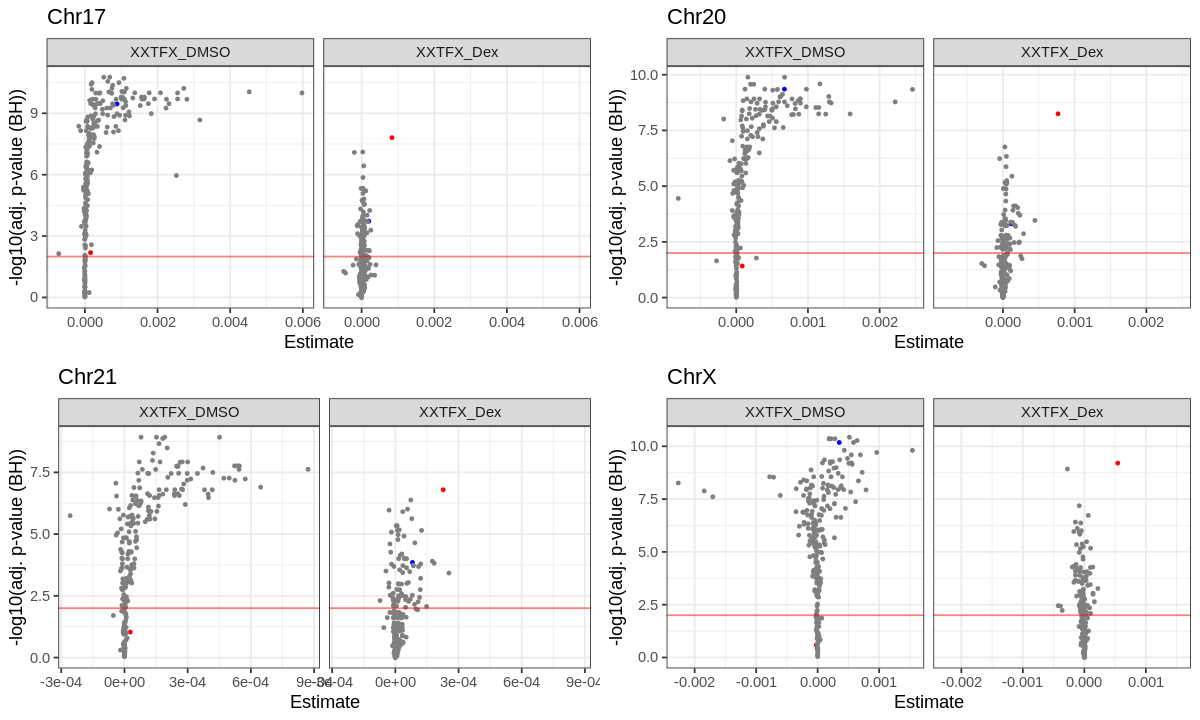

In [14]:
options(repr.plot.height=6, repr.plot.width=10)
grid.arrange(grobs = lst_gpt, ncol = 2)

In [ ]:
gpt = ggplot(dat, aes(x=Estimate, y=-log10(`Pr(>|t|)`))) + 
    geom_point(size=0.5) + 
    geom_hline(yintercept = 2, color="red", alpha=0.5) +
    theme_bw() + 
    facet_wrap(~X)

options(repr.plot.height=5, repr.plot.width=8)
print(gpt)

In [99]:
lst_dat = lapply(names(lst_res), function(mtf){
    res = lst_res[[mtf]]
    dat = as.data.frame(coef(res))
    dat = rownames_to_column(dat, var="X")
    dat$Motif = mtf
    return(dat)
})

In [101]:
dat = bind_rows(lst_dat)
dat = dat %>% dplyr::filter(str_detect(X, "Intercept", negate = TRUE))
dat$Color = fun(dat$Motif)
dat$X = factor(dat$X, levels=c("XXTFX_DMSO", "XXTFX_Dex"))

In [102]:
unique(dat$X)

[1] XXTFX_DMSO XXTFX_Dex 
Levels: XXTFX_DMSO XXTFX_Dex

In [103]:
head(dat, 10)

,X,Estimate,Std. Error,t value,Pr(>|t|),Motif,Color
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,XXTFX_DMSO,-1.511581e-06,4.017603e-07,-3.762396,3.707539e-03,AIRE,grey50
2,XXTFX_Dex,4.882162e-07,4.234926e-07,1.152833,2.757912e-01,AIRE,grey50
3,XXTFX_DMSO,6.719896e-04,1.914503e-05,35.099949,8.354942e-12,AP1/1,blue
4,XXTFX_Dex,1.147420e-04,2.018063e-05,5.685750,2.022334e-04,AP1/1,blue
5,XXTFX_DMSO,4.369078e-04,2.013459e-05,21.699364,9.655931e-10,AP1/2,grey50
6,XXTFX_Dex,3.442129e-05,2.122372e-05,1.621831,1.359056e-01,AP1/2,grey50
7,XXTFX_DMSO,1.412482e-05,1.602430e-06,8.814624,4.987627e-06,BATF,grey50
8,XXTFX_Dex,-5.040664e-06,1.689110e-06,-2.984213,1.370860e-02,BATF,grey50
9,XXTFX_DMSO,9.519797e-07,5.178364e-07,1.838379,9.585264e-02,BCL6/1,grey50


In [104]:
dim(dat)

[1] 480   7

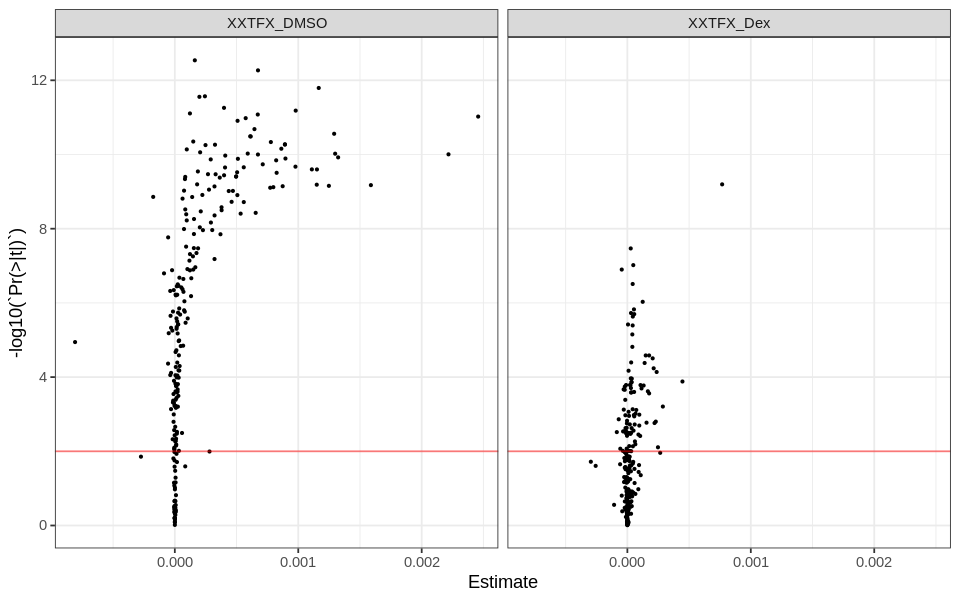

In [105]:
gpt = ggplot(dat, aes(x=Estimate, y=-log10(`Pr(>|t|)`))) + 
    geom_point(size=0.5) + 
    geom_hline(yintercept = 2, color="red", alpha=0.5) +
    theme_bw() + 
    facet_wrap(~X)

options(repr.plot.height=5, repr.plot.width=8)
print(gpt)

In [106]:
unique(dat$Color)

[1] "grey50" "blue"   "red"

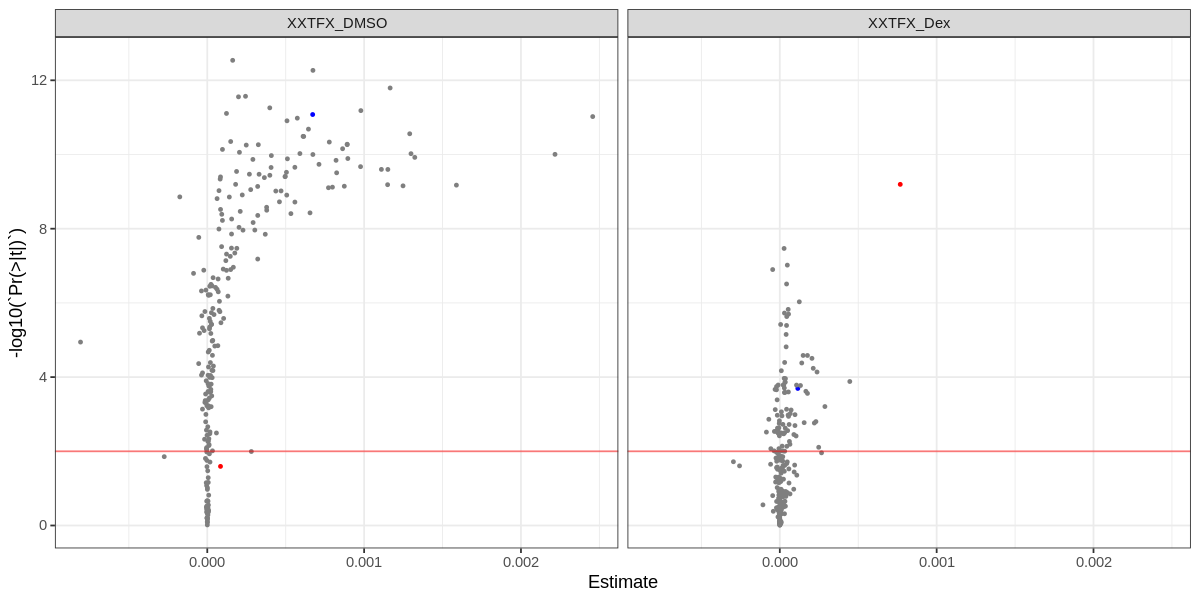

In [107]:
gpt = ggplot(dat, aes(x=Estimate, y=-log10(`Pr(>|t|)`))) + 
    geom_point(size=0.7, color=dat$Color) + 
    geom_hline(yintercept = 2, color="red", alpha=0.5) +
    theme_bw() + 
    facet_wrap(~X)

options(repr.plot.height=5, repr.plot.width=10)
print(gpt)